In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





## Endauswertung der vorbereiteten CSV-Dateien

In diesem Notebook erfolgt nun die **eigentliche Analyse** der zuvor berechneten und gespeicherten **`*_avg_rom.csv`**-Dateien.

Zuerst werden alle relevanten Dateien aus dem entsprechenden Ordner geladen, und die enthaltenen ROM-Werte pro Schub-Zyklus in DataFrames eingelesen.


Die Daten stehen danach gesammelt in einer **Liste (`alle_dfs`)** sowie optional in einem **Dictionary (`daten_dict`)**, das eine einfache Zuordnung anhand des Dateinamens erlaubt – z. B. `"Dominic_Flach_1"`.

Das legt die Grundlage für die Auswertung


In [42]:
# Pfad zum Ordner mit den Dateien
daten_ordner = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data_nach_Auswertung"

# Alle Dateien mit "_avg_rom.csv" im Namen
dateien = [f for f in os.listdir(daten_ordner) if f.endswith("_avg_rom.csv")]

# Liste für alle DataFrames
alle_dfs = []

# Optional: Dictionary zur Zuordnung von Dateiname -> DataFrame
daten_dict = {}

for datei in dateien:
    pfad = os.path.join(daten_ordner, datei)
    
    # Kommentare mit "#" ignorieren
    df = pd.read_csv(pfad, sep=";", comment="#")

    # Dateiname ohne Erweiterung als Schlüssel (z.B. Dominic_Flach_1)
    name = os.path.splitext(datei)[0]

    # Speichern in Liste und Dict
    alle_dfs.append(df)
    daten_dict[name] = df

print(f"{len(alle_dfs)} Dateien erfolgreich eingelesen.")


11 Dateien erfolgreich eingelesen.



## Vergleich der ROM-Verläufe **ohne Normierung**

In diesem Schritt wurden die ROM-Verläufe für Hüfte, Knie, Ellbogen und Sprunggelenk im flachen Gelände zunächst **ohne zeitliche Normierung** dargestellt.
Die x-Achse zeigt dabei die **Schubnummer** aus den einzelnen Aufzeichnungen.

### Ziel:

* Überblick über die ROM-Verläufe **in ihrer Originalform**
* Erste Gegenüberstellung der **unbearbeiteten Bewegungsdaten**

### Problem:

* Die Anzahl und Länge der Schubzyklen war je nach Proband und Aufzeichnung **unterschiedlich**
* Dadurch entstand ein **unübersichtliches Gesamtbild**, das einen direkten Vergleich erschwert

### Konsequenz:

→ Für die eigentliche Analyse wurde anschließend auf eine **zeitliche Normierung und Interpolation** umgestellt, um die ROM-Verläufe **vergleichbar** zu machen.


Plot gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Vergleich_Gelenke_ROM\Hip_Avg_ROM_Vergleich_ohne_Normierung.png


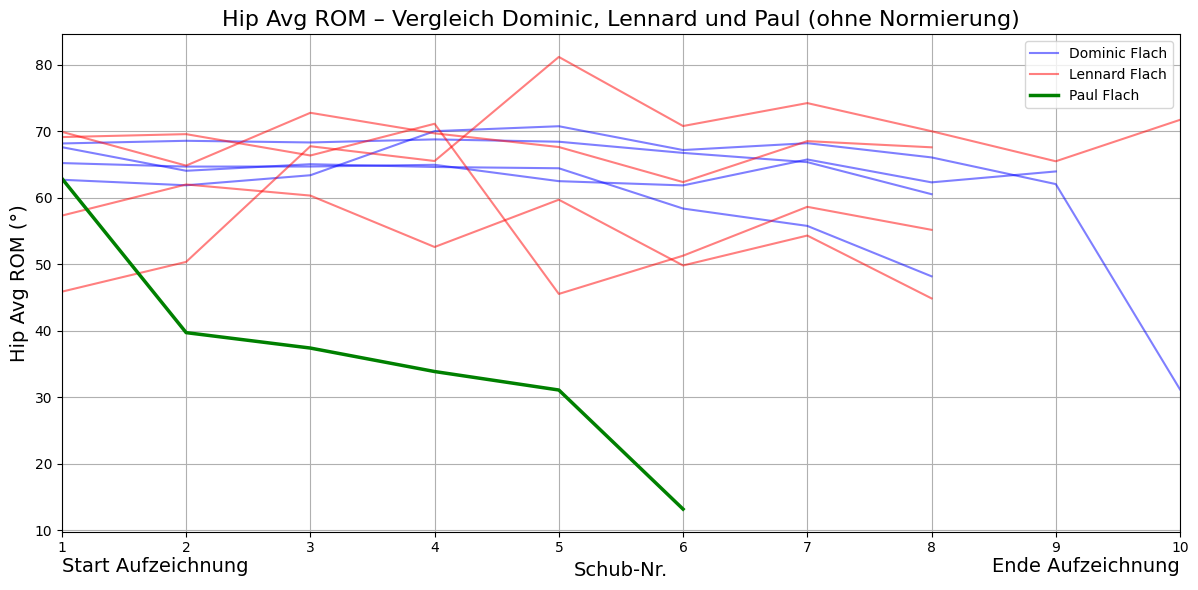

In [43]:
def plot_avg_rom_comparison_ohne_normierung(joint_name, daten_dict, save_dir=None):
    """
    Plottet den ROM-Verlauf für Dominic, Lennard und Paul im flachen Gelände,
    OHNE Normierung und Interpolation – d.h. die Kurven können unterschiedlich lang sein.
    Die x-Achse ist die Schubnummer aus der CSV ("Schub-Nr."), nicht der DataFrame-Index.
    Optional: Speichert den Plot als PNG, wenn save_dir angegeben ist.

    Parameter:
    - joint_name (str): z. B. "Hip Avg ROM", "Knee Avg ROM", ...
    - daten_dict (dict): Dictionary mit {name: DataFrame} aller eingelesenen CSVs
    - save_dir (str, optional): Ordnerpfad zum Speichern des Plots
    """

    dominic_dfs = [df for name, df in daten_dict.items() if name.startswith("Dominic_Flach")]
    lennard_dfs = [df for name, df in daten_dict.items() if name.startswith("Lennard_Flach")]
    paul_dfs = [df for name, df in daten_dict.items() if name.startswith("Paul_Flach")]

    plt.figure(figsize=(12, 6))

    # Dominic
    for df in dominic_dfs:
        if "Schub-Nr." in df.columns:
            x = df["Schub-Nr."]
        else:
            x = df.index
        plt.plot(x, df[joint_name], color="blue", alpha=0.5, label="Dominic Flach" if 'Dominic Flach' not in plt.gca().get_legend_handles_labels()[1] else "")
    # Lennard
    for df in lennard_dfs:
        if "Schub-Nr." in df.columns:
            x = df["Schub-Nr."]
        else:
            x = df.index
        plt.plot(x, df[joint_name], color="red", alpha=0.5, label="Lennard Flach" if 'Lennard Flach' not in plt.gca().get_legend_handles_labels()[1] else "")
    # Paul
    for df in paul_dfs:
        if "Schub-Nr." in df.columns:
            x = df["Schub-Nr."]
        else:
            x = df.index
        plt.plot(x, df[joint_name], color="green", linewidth=2.5, label="Paul Flach" if 'Paul Flach' not in plt.gca().get_legend_handles_labels()[1] else "")

    gelenkname_kurz = joint_name.split()[0]
    plt.xlabel("Schub-Nr.", fontsize=14)
    plt.ylabel(f"{gelenkname_kurz} Avg ROM (°)", fontsize=14)
    plt.title(f"{gelenkname_kurz} Avg ROM – Vergleich Dominic, Lennard und Paul (ohne Normierung)", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # X-Achse von 0 bis 10 und Text "Start" und "Ende" UNTER der Achse
    plt.xlim(1, 10)
    y_min = plt.ylim()[0]
    plt.text(1, y_min - 0.05 * (plt.ylim()[1] - y_min), "Start Aufzeichnung", ha="left", va="top", fontsize=14)
    plt.text(10, y_min - 0.05 * (plt.ylim()[1] - y_min), "Ende Aufzeichnung", ha="right", va="top", fontsize=14)

    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        filename = f"{gelenkname_kurz}_Avg_ROM_Vergleich_ohne_Normierung.png".replace(" ", "_")
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot gespeichert unter: {save_path}")

    plt.show()
# Beispiel-Aufruf:
plot_avg_rom_comparison_ohne_normierung("Hip Avg ROM", daten_dict, save_dir=r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Vergleich_Gelenke_ROM")


## Vergleich der Gelenkbewegung (ROM) im flachen Gelände

In diesem Abschnitt wird der **ROM-Verlauf** (Range of Motion) für Hüfte, Knie, Ellbogen und Sprunggelenk im **flachen Gelände** zwischen **Dominic**, **Lennard** und **Paul** verglichen.

---

### Vorgehen:

* Die Aufzeichnungen bestanden aus **unterschiedlich vielen Schubzyklen** (z. B. 7 bis 10 Stockschübe pro Durchgang)
* Auch die **Dauer einzelner Zyklen** variierte deutlich zwischen den Probanden
* Daher wurden alle ROM-Verläufe auf eine **einheitliche Skala von 0–100 %** des Schubverlaufs **zeitlich normiert und interpoliert**
* So können die Bewegungsabläufe **direkt über die Zeit hinweg verglichen** werden – unabhängig von Schubanzahl oder Geschwindigkeit

---

### Darstellung:

* Für **Dominic** und **Lennard** wurde aus mehreren Aufzeichnungen jeweils der **Mittelwert** des ROM-Verlaufs berechnet
* Zusätzlich wird die **Standardabweichung (SD)** als farbige Fläche dargestellt → zeigt, wie stark die Bewegungen zwischen den Zyklen schwanken
* Für **Paul** wurde ein einzelner ROM-Verlauf geplottet (nur eine verfügbare Messung)

---

### Ziel:

Die normierte Darstellung ermöglicht einen **klaren Vergleich zwischen den Probanden**, sowohl im **Bewegungsausmaß** als auch im **Verlauf über den Schubzyklus**.
Typische Bewegungstendenzen und Abweichungen werden so **besser sichtbar**, als es mit rohen, nicht normierten Daten möglich wäre.

Die Plots wurden automatisiert als **PNG-Dateien gespeichert** und stehen für **Bericht und Präsentation** bereit.



In [ ]:
def plot_avg_rom_comparison(joint_name, daten_dict, save_dir=None):
    """
    Plottet den Durchschnitts-ROM-Verlauf + SD-Schatten für Dominic & Lennard
    und den Einzelverlauf für Paul.
    Optional: Speichert den Plot als PNG, wenn save_dir angegeben ist.

    Parameter:
    - joint_name (str): z. B. "Hip Avg ROM", "Knee Avg ROM", ...
    - daten_dict (dict): Dictionary mit {name: DataFrame} aller eingelesenen CSVs
    - save_dir (str, optional): Ordnerpfad zum Speichern des Plots
    """

    def prepare_interp_curves(df_list, joint_col):
        norm_x = np.linspace(0, 1, 100)
        curves = []
        for df in df_list:
            df_clean = df[pd.to_numeric(df[joint_col], errors="coerce").notna()]
            if len(df_clean) < 2:
                continue
            x = np.linspace(0, 1, len(df_clean))
            y = df_clean[joint_col].values
            y_interp = np.interp(norm_x, x, y)
            curves.append(y_interp)
        return norm_x, np.array(curves)

    # Daten vorbereiten
    dominic_dfs = [df for name, df in daten_dict.items() if name.startswith("Dominic_Flach")]
    lennard_dfs = [df for name, df in daten_dict.items() if name.startswith("Lennard_Flach")]
    paul_dfs = [df for name, df in daten_dict.items() if name.startswith("Paul_Flach")]

    # Interpolieren
    norm_x, dominic_curves = prepare_interp_curves(dominic_dfs, joint_name)
    _, lennard_curves = prepare_interp_curves(lennard_dfs, joint_name)
    _, paul_curves = prepare_interp_curves(paul_dfs, joint_name)

    # Plot vorbereiten
    plt.figure(figsize=(12, 6))

    if dominic_curves.size > 0:
        dom_mean = np.mean(dominic_curves, axis=0)
        dom_std = np.std(dominic_curves, axis=0)
        plt.plot(norm_x * 100, dom_mean, color="blue", linewidth=2.5, label="Dominic Flach (Ø)")
        plt.fill_between(norm_x * 100, dom_mean - dom_std, dom_mean + dom_std,
                         color="blue", alpha=0.2, label="Dominic ± SD")

    if lennard_curves.size > 0:
        len_mean = np.mean(lennard_curves, axis=0)
        len_std = np.std(lennard_curves, axis=0)
        plt.plot(norm_x * 100, len_mean, color="red", linewidth=2.5, label="Lennard Flach (Ø)")
        plt.fill_between(norm_x * 100, len_mean - len_std, len_mean + len_std,
                         color="red", alpha=0.2, label="Lennard ± SD")

    if len(paul_curves) > 0:
        plt.plot(norm_x * 100, paul_curves[0], color="green", linewidth=2.5, label="Paul Flach")

    # Achsenbeschriftung & Layout
    gelenkname_kurz = joint_name.split()[0]  # z. B. "Hip"
    plt.xlabel("Normierter Schubverlauf (%)", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel(f"{gelenkname_kurz} Avg ROM (°)", fontsize=14)
    plt.title(f"{gelenkname_kurz} Avg ROM – Vergleich Dominic, Lennard und Paul (Flaches Gelände)", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Plot speichern, falls gewünscht
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        filename = f"{gelenkname_kurz}_Avg_ROM_Vergleich.png".replace(" ", "_")
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot gespeichert unter: {save_path}")

    plt.show()  # Plot anzeigen in Jupyter Notebook 

ordnerpfad = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Vergleich_Gelenke_ROM"

plot_avg_rom_comparison("Hip Avg ROM", daten_dict, save_dir= ordnerpfad)
plot_avg_rom_comparison("Knee Avg ROM", daten_dict, save_dir= ordnerpfad)
plot_avg_rom_comparison("Elbow Avg ROM", daten_dict, save_dir= ordnerpfad)
plot_avg_rom_comparison("Ankle Avg ROM", daten_dict, save_dir= ordnerpfad)


Folgende Funktion gibt den Gesamtmittelwert ± Standardabweichung für den angegebenen ROM-Parameter
    für Dominic, Lennard und Paul im flachen Gelände aus.

In [ ]:
def print_avg_rom_stats(joint_name, daten_dict):
    """
    Gibt den Gesamtmittelwert ± Standardabweichung für den angegebenen ROM-Parameter
    für Dominic, Lennard und Paul im flachen Gelände aus.
    """
    def prepare_interp_curves(df_list, joint_col):
        norm_x = np.linspace(0, 1, 100)
        curves = []
        for df in df_list:
            df_clean = df[pd.to_numeric(df[joint_col], errors="coerce").notna()]
            if len(df_clean) < 2:
                continue
            x = np.linspace(0, 1, len(df_clean))
            y = df_clean[joint_col].values
            y_interp = np.interp(norm_x, x, y)
            curves.append(y_interp)
        return np.array(curves)

    # Daten vorbereiten
    dominic_dfs = [df for name, df in daten_dict.items() if name.startswith("Dominic_Flach")]
    lennard_dfs = [df for name, df in daten_dict.items() if name.startswith("Lennard_Flach")]
    paul_dfs = [df for name, df in daten_dict.items() if name.startswith("Paul_Flach")]

    dominic_curves = prepare_interp_curves(dominic_dfs, joint_name)
    lennard_curves = prepare_interp_curves(lennard_dfs, joint_name)
    paul_curves = prepare_interp_curves(paul_dfs, joint_name)

    if dominic_curves.size > 0:
        dom_mean = np.mean(dominic_curves, axis=0)
        dom_std = np.std(dominic_curves, axis=0)
        print(f"Dominic Flach: {np.mean(dom_mean):.2f} ± {np.mean(dom_std):.2f}")
    else:
        print("Dominic Flach: Keine Daten")

    if lennard_curves.size > 0:
        len_mean = np.mean(lennard_curves, axis=0)
        len_std = np.std(lennard_curves, axis=0)
        print(f"Lennard Flach: {np.mean(len_mean):.2f} ± {np.mean(len_std):.2f}")
    else:
        print("Lennard Flach: Keine Daten")

    if len(paul_curves) > 0:
        paul_mean = np.mean(paul_curves[0])
        paul_std = np.std(paul_curves[0])
        print(f"Paul Flach: {paul_mean:.2f} ± {paul_std:.2f}")
    else:
        print("Paul Flach: Keine Daten")

# Beispiel-Aufruf:
print_avg_rom_stats("Knee Avg ROM", daten_dict)
#print_avg_rom_stats("Hip Avg ROM", daten_dict)
#print_avg_rom_stats("Ankle Avg ROM", daten_dict)
#print_avg_rom_stats("Elbow Avg ROM", daten_dict)



Dominic Flach: 39.60 ± 1.95
Lennard Flach: 54.21 ± 7.42
Paul Flach: 14.78 ± 6.43




## Vergleich: Flach vs. Berg – ROM-Verläufe bei Dominic

In diesem letzten Auswertungsschritt wird untersucht, **wie sich die Bewegungsausführung von Dominic zwischen flachem Gelände und Bergauf-Strecke unterscheidet**.
Leider waren nur bei Dominic brauchbare Daten vorhanden von den Berg Aufzeichnungen

### Was passiert hier?

* Für jedes Gelenk (Hüfte, Knie, Ellbogen, Sprunggelenk) werden die ROM-Werte **zeitlich normalisiert** und über alle Zyklen hinweg gemittelt – einmal für die **flachen Bedingungen**, einmal für **bergauf**.
* Zusätzlich wird die **Standardabweichung (± SD)** geplottet, um zu zeigen, wie stark die Bewegung über die Zyklen schwankt.
* So lassen sich **systematische Unterschiede im Bewegungsablauf** zwischen den beiden Geländetypen sichtbar machen – z. B. mehr Hüftbeugung am Berg oder geringerer Knie-ROM auf der Ebene.

### Ziel:

Der Plot liefert einen ersten Eindruck, ob und wie sich die Bewegung in Abhängigkeit vom Gelände (flach vs. bergauf) unterscheidet.
Eine konkrete Interpretation der Unterschiede erfolgt dann im Rahmen der Präsentation.

Die erzeugten Plots werden automatisch im angegebenen Ordner gespeichert.


Plot gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Vergleich_Berg_Flach\Hip_Flach_vs_Berg.png


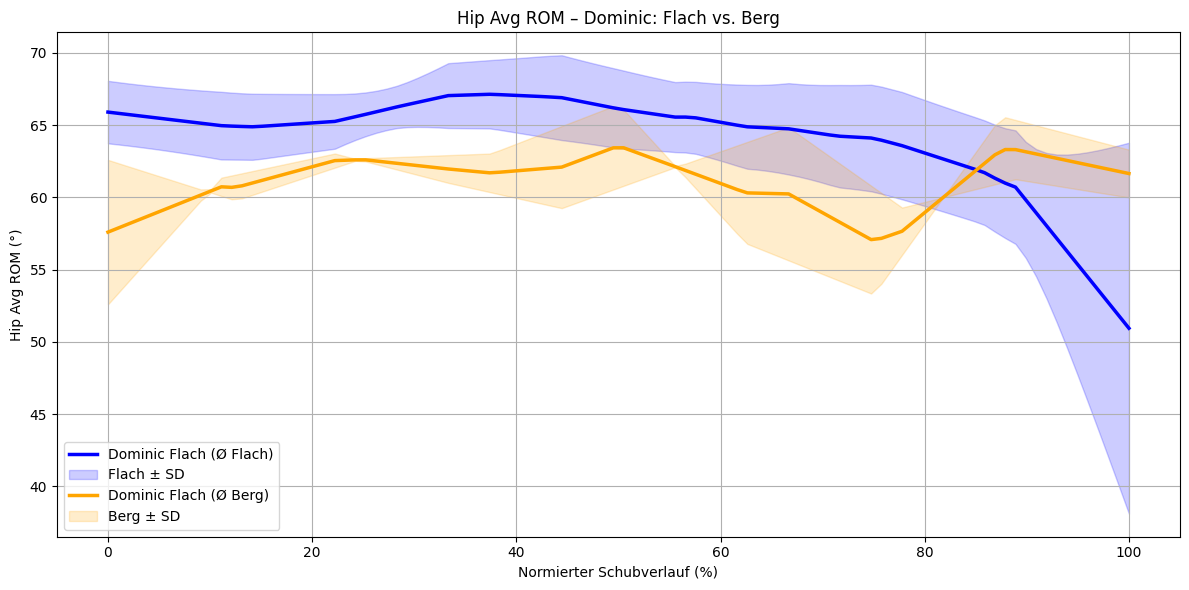

Plot gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Vergleich_Berg_Flach\Knee_Flach_vs_Berg.png


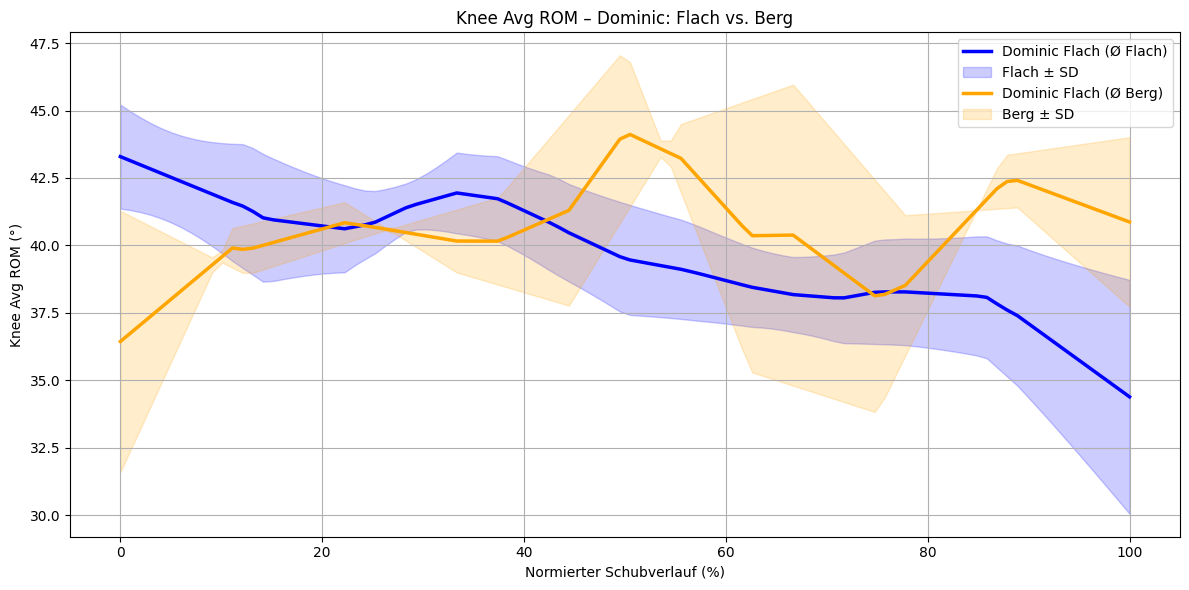

Plot gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Vergleich_Berg_Flach\Elbow_Flach_vs_Berg.png


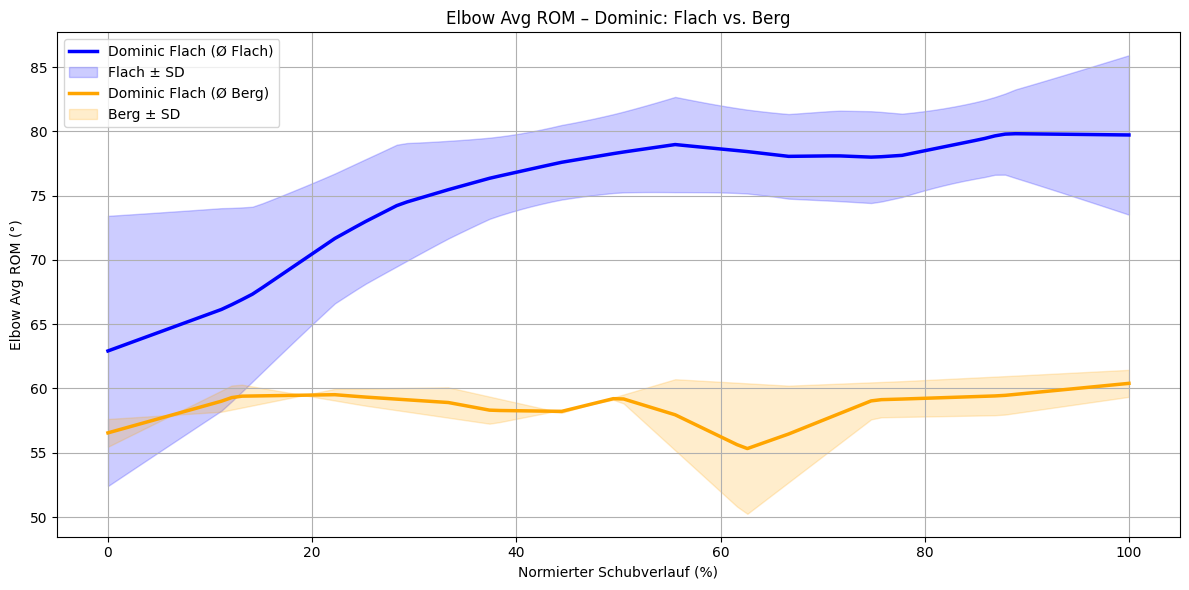

Plot gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Vergleich_Berg_Flach\Ankle_Flach_vs_Berg.png


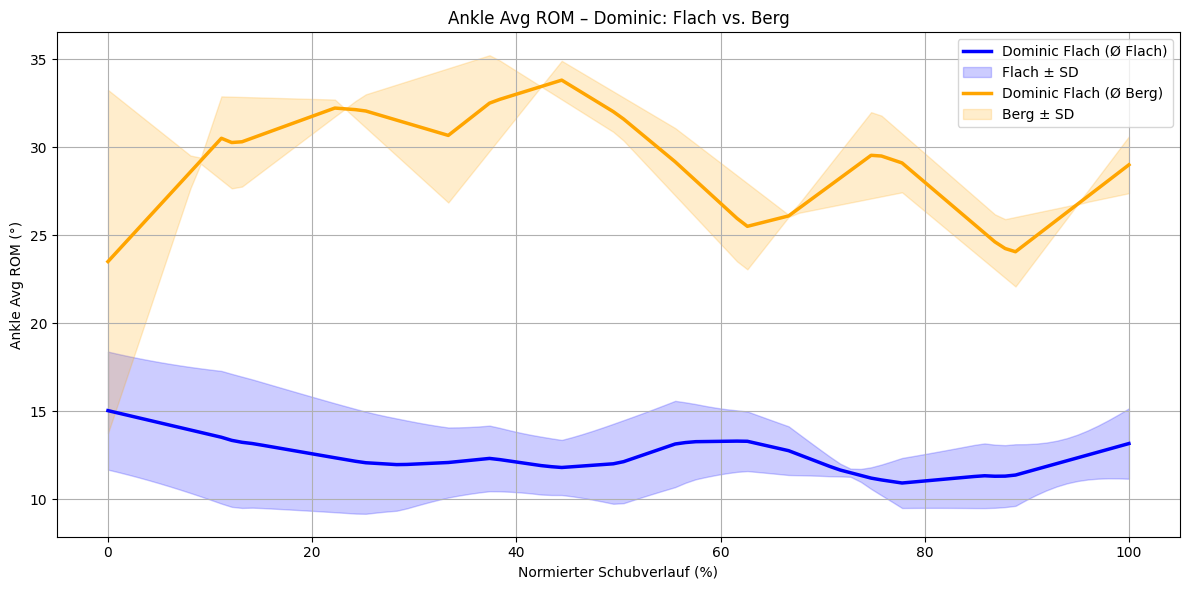

In [ ]:
def plot_flach_vs_berg_dominic(joint_name, daten_dict, save_dir=None):
    """
    Vergleicht die ROM-Verläufe von Dominic im Flachen vs. am Berg
    für das angegebene Gelenk.
    Optional: Speichert den Plot als PNG, wenn save_dir angegeben ist.
    """

    def prepare_interp_curves(df_list, joint_col):
        norm_x = np.linspace(0, 1, 100)
        curves = []
        for df in df_list:
            df_clean = df[pd.to_numeric(df[joint_col], errors="coerce").notna()]
            if len(df_clean) < 2:
                continue
            x = np.linspace(0, 1, len(df_clean))
            y = df_clean[joint_col].values
            y_interp = np.interp(norm_x, x, y)
            curves.append(y_interp)
        return norm_x, np.array(curves)

    # Flach- und Berg-Daten von Dominic selektieren
    dominic_flach_dfs = [df for name, df in daten_dict.items() if "Dominic_Flach" in name]
    dominic_berg_dfs = [df for name, df in daten_dict.items() if "Dominic_Berg" in name]

    # Interpolieren
    norm_x, flach_curves = prepare_interp_curves(dominic_flach_dfs, joint_name)
    _, berg_curves = prepare_interp_curves(dominic_berg_dfs, joint_name)

    # Mittelwerte & Standardabweichungen
    flach_mean = np.mean(flach_curves, axis=0)
    flach_std = np.std(flach_curves, axis=0)

    berg_mean = np.mean(berg_curves, axis=0)
    berg_std = np.std(berg_curves, axis=0)

    # Plot
    plt.figure(figsize=(12, 6))

    # Flach
    plt.plot(norm_x * 100, flach_mean, color="blue", linewidth=2.5, label="Dominic Flach (Ø Flach)")
    plt.fill_between(norm_x * 100, flach_mean - flach_std, flach_mean + flach_std,
                     color="blue", alpha=0.2, label="Flach ± SD")

    # Berg
    plt.plot(norm_x * 100, berg_mean, color="orange", linewidth=2.5, label="Dominic Flach (Ø Berg)")
    plt.fill_between(norm_x * 100, berg_mean - berg_std, berg_mean + berg_std,
                     color="orange", alpha=0.2, label="Berg ± SD")

    # Achsen & Titel
    gelenk_kurz = joint_name.split()[0]
    plt.xlabel("Normierter Schubverlauf (%)")
    plt.ylabel(f"{gelenk_kurz} Avg ROM (°)")
    plt.title(f"{gelenk_kurz} Avg ROM – Dominic: Flach vs. Berg")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Plot speichern, falls gewünscht
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        filename = f"{gelenk_kurz}_Flach_vs_Berg.png".replace(" ", "_")
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot gespeichert unter: {save_path}")

    plt.show()  # Plot schließen, damit im Notebook nichts angezeigt wird, wenn gespeichert wird

# Speichern der Plots
ordnerpfad1 = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Vergleich_Berg_Flach"
plot_flach_vs_berg_dominic("Hip Avg ROM", daten_dict, save_dir=ordnerpfad1)
plot_flach_vs_berg_dominic("Knee Avg ROM", daten_dict, save_dir=ordnerpfad1)
plot_flach_vs_berg_dominic("Elbow Avg ROM", daten_dict, save_dir=ordnerpfad1)
plot_flach_vs_berg_dominic("Ankle Avg ROM", daten_dict, save_dir=ordnerpfad1)




## Übersicht aller Aufzeichnungen mit Schubzeit-Statistiken

Zum Abschluss wird hier automatisch eine **Zusammenfassung aller ausgewerteten Aufzeichnungen** erstellt.

Für jede `*_avg_rom.csv`-Datei werden die wichtigsten Informationen gesammelt:

* **Person & Aktivität**
* **Dateiname**
* **Durchschnittliche Schubzeit (Ø)**
* **Standardabweichung der Schubzeit**
* **Schübe pro Minute**
* **Gesamtanzahl der erkannten Schübe**

Die Infos werden in einem übersichtlichen DataFrame zusammengefasst und zusätzlich als **CSV-Datei** gespeichert – so hat man schnell einen Gesamtüberblick über alle analysierten Daten.


In [ ]:
def auflisten_aufzeichnungen_mit_stats(ordner_pfad, dateiname="Schubzeit_Uebersicht.csv"):
    """
    Listet alle *_avg_rom.csv Dateien im angegebenen Ordner und speichert die
    Übersicht als CSV-Datei im selben Ordner.
    
    Enthält:
    - Person
    - Aktivität
    - Dateiname
    - mean_dt (s), std_dt (s), Shoves/min
    - Anzahl Schübe
    
    Werte sind auf 2 Nachkommastellen gerundet.
    """

    zusammenfassung = []

    # Alle passenden Dateien im Ordner
    dateien = [f for f in os.listdir(ordner_pfad) if f.endswith("_avg_rom.csv")]

    for datei in dateien:
        pfad = os.path.join(ordner_pfad, datei)
        name = os.path.splitext(datei)[0]

        # Kommentarzeilen lesen
        mean_dt = std_dt = shoves_per_minute = None
        with open(pfad, "r", encoding="utf-8") as f:
            for _ in range(5):
                line = f.readline()
                if line.startswith("# mean_dt:"):
                    mean_dt = round(float(line.split(":")[1].strip()), 2)
                elif line.startswith("# std_dt:"):
                    std_dt = round(float(line.split(":")[1].strip()), 2)
                elif line.startswith("# shoves_per_minute:"):
                    shoves_per_minute = round(float(line.split(":")[1].strip()), 2)
                elif not line.startswith("#"):
                    break

        # Daten lesen
        df = pd.read_csv(pfad, sep=";", comment="#")
        anzahl_schuebe = round(df["Schub-Nr."].count(), 2)

        # Name & Aktivität extrahieren
        teile = name.split("_")
        person = teile[0]
        aktivitaet = teile[1] if len(teile) > 1 else "Unbekannt"

        zusammenfassung.append({
            "Person": person,
            "Aktivität": aktivitaet,
            "Dateiname": datei,
            "Ø Schubzeit (s)": mean_dt,
            "Schubzeit SD (s)": std_dt,
            "Schübe pro Minute": shoves_per_minute,
            "Anzahl Schübe": anzahl_schuebe
        })

    # DataFrame erzeugen
    df_zusammenfassung = pd.DataFrame(zusammenfassung)

    # Datei speichern
    speicherpfad = os.path.join(ordner_pfad, dateiname)
    df_zusammenfassung.to_csv(speicherpfad, sep=";", index=False)
    print(f"Übersicht gespeichert unter: {speicherpfad}")

    return df_zusammenfassung

# Speichern der Übersicht
ordner = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data_nach_Auswertung"
df_info = auflisten_aufzeichnungen_mit_stats(ordner)

Übersicht gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data_nach_Auswertung\Schubzeit_Uebersicht.csv



## Export der Schubzeit-Übersicht als PDF

Damit die zuvor erstellte Übersicht aller Aufzeichnungen (inkl. Schubzeiten, Schubfrequenz etc.) auch **außerhalb von Python leicht weiterverwendet** werden kann, wird sie hier zusätzlich als **PDF-Tabelle** gespeichert.

Der Export erfolgt automatisch unter dem angegebenen Pfad.


In [ ]:
def save_stats_table_as_pdf(df, pdf_path, title="Schubzeit Übersicht"):
    """
    Speichert ein DataFrame als Tabelle im PDF-Format.
    """
    fig, ax = plt.subplots(figsize=(len(df.columns)*1.5, len(df)*0.5 + 2))
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    plt.title(title, fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig(pdf_path, bbox_inches='tight')
    plt.close()
    print(f"Tabelle als PDF gespeichert unter: {pdf_path}")

# Speichern der Übersicht als PDF
pdf_path = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Uebersicht_alle_Aufzeichnungen.pdf"
save_stats_table_as_pdf(df_info, pdf_path, title="Übersicht aller Aufzeichnungen mit Schubzeiten")

Tabelle als PDF gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Uebersicht_alle_Aufzeichnungen.pdf



## Vergleich der Schubfrequenz zwischen Personen und Geländeformen

Zum Abschluss wird ein **gruppiertes Balkendiagramm** erstellt, das die **durchschnittliche Anzahl an Schüben pro Minute** für jede Person und Aktivität zeigt:

* **Dominic:** getrennt für **flach** und **bergauf**
* **Lennard:** flaches Gelände
* **Paul:** ein einzelner Durchgang im flachen Gelände

Zusätzlich wird in jedem Balken die **Anzahl der verwendeten Aufzeichnungen (`n`)** angezeigt, und der **genaue Mittelwert** steht über dem jeweiligen Balken.

### Ziel:

Der Plot bietet einen kompakten Überblick darüber, **wie aktiv (im Sinne der Schubfrequenz)** die einzelnen Teilnehmer waren – und ob es Unterschiede je nach **Person** oder **Geländeform** gab.

Der Plot wird zudem automatisch als PNG-Datei im Ordner "Ergebnisse_Plots" gespeichert


Plot gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots\Schuebe_pro_Minute_Vergleich.png


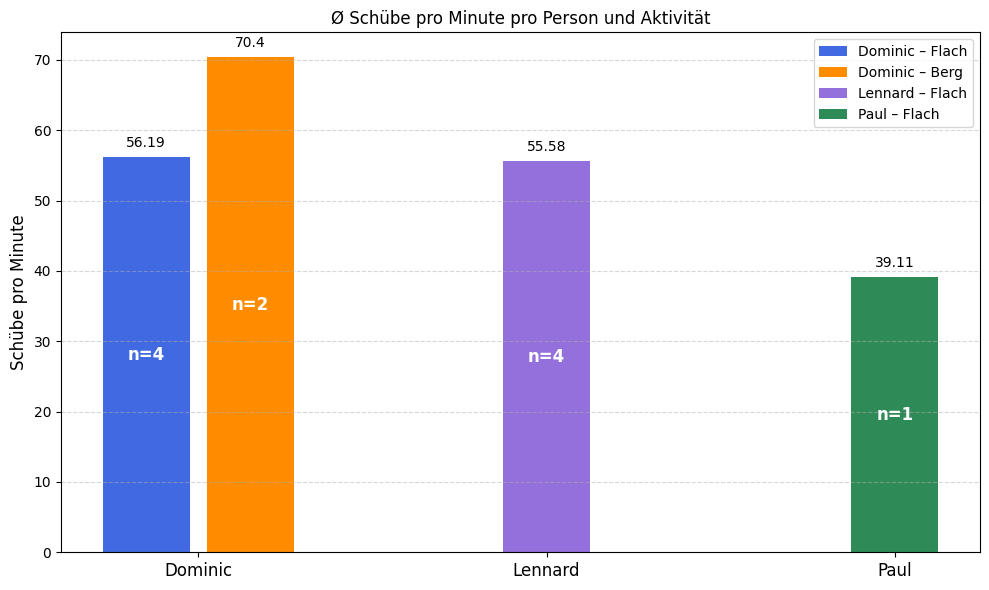

In [ ]:
def plot_shoves_per_minute_mittelwerte(df_info, save_dir=None):
    """
    Erstellt ein gruppiertes Säulendiagramm mit:
    - Dominic: Ø Flach & Ø Berg
    - Lennard: Ø Flach
    - Paul: Einzelwert

    Zeigt außerdem Anzahl der Datensätze im Balken.
    Optional: Speichert den Plot als PNG, wenn save_dir angegeben ist.
    """
    df = df_info.copy()
    balken = []

    # Dominic – Flach
    dom_flach = df[(df["Person"] == "Dominic") & (df["Aktivität"] == "Flach")]
    if not dom_flach.empty:
        mittelwert = round(dom_flach["Schübe pro Minute"].mean(), 2)
        anzahl = len(dom_flach)
        balken.append(("Dominic", "Flach", mittelwert, anzahl))

    # Dominic – Berg
    dom_berg = df[(df["Person"] == "Dominic") & (df["Aktivität"] == "Berg")]
    if not dom_berg.empty:
        mittelwert = round(dom_berg["Schübe pro Minute"].mean(), 2)
        anzahl = len(dom_berg)
        balken.append(("Dominic", "Berg", mittelwert, anzahl))

    # Lennard – Flach
    lenn_flach = df[(df["Person"] == "Lennard") & (df["Aktivität"] == "Flach")]
    if not lenn_flach.empty:
        mittelwert = round(lenn_flach["Schübe pro Minute"].mean(), 2)
        anzahl = len(lenn_flach)
        balken.append(("Lennard", "Flach", mittelwert, anzahl))

    # Paul – Gesamt
    paul = df[df["Person"] == "Paul"]
    if not paul.empty:
        mittelwert = round(paul["Schübe pro Minute"].mean(), 2)
        anzahl = len(paul)
        balken.append(("Paul", "Flach", mittelwert, anzahl))

    # DataFrame für Plot
    df_balken = pd.DataFrame(balken, columns=["Person", "Typ", "Schübe pro Minute", "Anzahl"])

    # Farben für (Person, Typ)
    farben = {
        ("Dominic", "Flach"): "royalblue",
        ("Dominic", "Berg"): "darkorange",
        ("Lennard", "Flach"): "mediumpurple",
        ("Paul", "Flach"): "seagreen"
    }

    fig, ax = plt.subplots(figsize=(10, 6))

    personen = df_balken["Person"].unique()

    for i, person in enumerate(personen):
        person_data = df_balken[df_balken["Person"] == person]
        for j, row in enumerate(person_data.itertuples()):
            xpos = i + (j - len(person_data)/2) * 0.3 + 0.15
            farbe = farben.get((row.Person, row.Typ), "gray")

            # Balken zeichnen
            bar = ax.bar(xpos, row._3, width=0.25, color=farbe, label=f"{row.Person} – {row.Typ}")

            # Wert über Balken
            ax.text(xpos, row._3 + 1, f"{row._3}", ha='center', va='bottom', fontsize=10)

            # Anzahl im Balken
            ax.text(xpos, row._3 / 2, f"n={row.Anzahl}", ha='center', va='center', fontsize=12, color="white", fontweight="bold")

    # Achsen und Layout
    ax.set_xticks(np.arange(len(personen)))
    ax.set_xticklabels(personen, fontsize=12)
    ax.set_ylabel("Schübe pro Minute", fontsize=12) 
    ax.set_title("Ø Schübe pro Minute pro Person und Aktivität", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    # Legende ohne Duplikate
    handles, labels = ax.get_legend_handles_labels()
    seen = set()
    unique = [(h, l) for h, l in zip(handles, labels) if not (l in seen or seen.add(l))]
    ax.legend(*zip(*unique))

    plt.tight_layout()

    # Plot speichern, falls gewünscht
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, "Schuebe_pro_Minute_Vergleich.png")
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot gespeichert unter: {save_path}")

    plt.show()  # Plot anzeigen in Jupyter Notebook

# Speichern des Plots
ordnerpfad2 = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Ergebnisse_Plots"

plot_shoves_per_minute_mittelwerte(df_info, save_dir=ordnerpfad2)
